## Modeling and Predicting Cabinet Proportions in International Govs

## Imports

In [51]:
# data processing
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# polynomial reg, cross validation, PCA
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.linear_model import ElasticNetCV

# used for residual plots 
from yellowbrick.regressor import ResidualsPlot

## Reading in the dataset

In [52]:
url = '../datasets/cabinet_seats.csv'
df = pd.read_csv(url) # df is the original dataset

## Using theory to select certain variables

In [53]:
allvals = 'party,seats,sq_cabinet,sq_pm,election_year,banzhaf,shapley,splus,country,cabinet_name,caretaker,cabinet_party,prime_minister,left_rightx,left_righty,cabinet_seats,total_cabinet_size,party_name_english,country_id,election_id,seats_share,enpp,mingov,bicameral,miw_proportion,cabinet_proportion,seats_proportion,country_dummy1,country_dummy2,country_dummy3,country_dummy4,country_dummy5,country_dummy6,country_dummy7,country_dummy8,country_dummy9,country_dummy10,country_dummy11,country_dummy12,country_dummy13'.split(',')

In [54]:
vals = ['seats', 'sq_cabinet', 'banzhaf',
       'shapley', 'splus', 'caretaker', 'sq_pm',
       'cabinet_party', 'prime_minister', 'left_rightx',
       'cabinet_seats', 'total_cabinet_size', 'seats_share', 'enpp', 'mingov',
       'bicameral', 'miw_proportion', 'seats_proportion', 'cabinet_proportion']
yvar = 'cabinet_proportion'

In [55]:
drops = list(set(allvals) - set(vals))

print('Variables Dropped:', drops)
print('\nDropping',len(drops), 'variables and keeping',len(vals),'variables')

Variables Dropped: ['country_dummy6', 'country', 'country_dummy12', 'cabinet_name', 'country_dummy9', 'country_dummy5', 'country_dummy4', 'country_dummy13', 'election_year', 'country_dummy8', 'country_dummy1', 'country_dummy7', 'left_righty', 'country_dummy3', 'country_id', 'party_name_english', 'election_id', 'party', 'country_dummy10', 'country_dummy2', 'country_dummy11']

Dropping 21 variables and keeping 19 variables


## Observing means and std deviations before and after dropping data

In [56]:
# df1 is the dataset of all the values selected after applying thoery
df1 = df[vals]
df1.describe()

,seats,banzhaf,shapley,splus,caretaker,sq_pm,cabinet_party,prime_minister,left_rightx,cabinet_seats,total_cabinet_size,seats_share,enpp,mingov,bicameral,miw_proportion,seats_proportion,cabinet_proportion
count,657.000000,657.000000,657.000000,657.000000,657.000000,644.000000,657.000000,657.000000,605.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000,657.000000
mean,32.100457,0.129328,0.129337,0.129289,0.060883,0.128882,0.350076,0.127854,5.052198,2.304414,19.003044,12.813260,4.915088,0.324201,0.544901,0.129376,0.129376,0.129376
std,46.440287,0.144730,0.140964,0.140634,0.239297,0.335330,0.477357,0.334181,2.305746,4.174019,4.828143,12.112704,1.587204,0.468432,0.498359,0.108112,0.123545,0.226728
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667,0.000000,10.000000,0.158730,2.557285,0.000000,0.000000,0.000000,0.001587,0.000000
25%,7.000000,0.027027,0.027778,0.029893,0.000000,0.000000,0.000000,0.000000,3.158889,0.000000,15.000000,3.500000,3.712816,0.000000,0.000000,0.046326,0.035176,0.000000
50%,17.000000,0.076923,0.073449,0.074756,0.000000,0.000000,0.000000,0.000000,5.581111,0.000000,19.000000,8.022922,4.733491,0.000000,1.000000,0.100000,0.080402,0.000000
75%,39.000000,0.166667,0.166667,0.172758,0.000000,0.000000,1.000000,0.000000,6.944444,4.000000,21.000000,19.333334,5.544385,1.000000,1.000000,0.200000,0.193333,0.190476
max,319.000000,0.861111,0.833333,0.791459,1.000000,1.000000,1.000000,1.000000,9.888889,25.000000,31.000000,50.000000,9.050684,1.000000,1.000000,0.500000,0.500000,1.000000


In [57]:
# df2 is the dataset of the values in df1 after dropping missing values
# for the variables that are going to be inlcuded in the model

df2 = df1.dropna()
df2.describe()

,seats,banzhaf,shapley,splus,caretaker,sq_pm,cabinet_party,prime_minister,left_rightx,cabinet_seats,total_cabinet_size,seats_share,enpp,mingov,bicameral,miw_proportion,seats_proportion,cabinet_proportion
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,34.196995,0.138817,0.138773,0.138931,0.058431,0.136895,0.375626,0.136895,5.041891,2.482471,18.849750,13.744262,4.846217,0.325543,0.522538,0.137912,0.138947,0.139886
std,47.663725,0.147571,0.143500,0.143018,0.234752,0.344024,0.484689,0.344024,2.312174,4.295048,4.653994,12.219463,1.548155,0.468969,0.499909,0.108469,0.124582,0.233609
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.366667,0.000000,10.000000,0.317460,2.557285,0.000000,0.000000,0.000000,0.003180,0.000000
25%,9.000000,0.030877,0.033333,0.035423,0.000000,0.000000,0.000000,0.000000,3.158889,0.000000,15.500000,4.593851,3.712816,0.000000,0.000000,0.054217,0.046078,0.000000
50%,18.000000,0.086957,0.087013,0.087315,0.000000,0.000000,0.000000,0.000000,5.581111,0.000000,19.000000,8.938547,4.675471,0.000000,1.000000,0.111111,0.091304,0.000000
75%,41.000000,0.170822,0.182774,0.191121,0.000000,0.000000,1.000000,0.000000,6.944444,4.000000,21.000000,20.634920,5.477805,1.000000,1.000000,0.200000,0.206349,0.215839
max,319.000000,0.861111,0.833333,0.791459,1.000000,1.000000,1.000000,1.000000,9.888889,25.000000,31.000000,50.000000,9.050684,1.000000,1.000000,0.500000,0.500000,1.000000


## Scaling X values and applying Principal Component Analysis (Feature Selection)

In [58]:
# standardize X values
Xvals = StandardScaler().fit_transform(df2[vals].values)

In [59]:
n_components=5
pca1 = PCA(n_components)

# create 2 dimensional representation
latent_vars = pca1.fit_transform(Xvals)

variances = [x for x in pca1.explained_variance_ratio_]
variances.append(sum(pca1.explained_variance_ratio_))
varDf = pd.DataFrame(variances, 
                       index=['pca'+str(i+1) for i in range(n_components)]+['Total'])
varDf.columns = ['Explained Variance Ratio']

print('This dataframe shows the explained variance ratio for the pca variables')
varDf.head(10)

This dataframe shows the explained variance ratio for the pca variables


,Explained Variance Ratio
pca1,0.469654
pca2,0.096089
pca3,0.069448
pca4,0.064472
pca5,0.058898
Total,0.758560


In [60]:
# check components to see if they make sense
componentsDf = pd.DataFrame(index = vals)
for i in range(len(pca1.components_)):
    componentsDf[vals[i]]=pca1.components_[i]
componentsDf.columns = ['pca'+str(i+1) for i in range(n_components)]

print('This dataframe shows the components according to variables used and the pca components leftover')
componentsDf.head(20)

This dataframe shows the components according to variables used and the pca components leftover


,pca1,pca2,pca3,pca4,pca5
seats,0.220005,0.011708,0.314786,0.116561,0.337267
sq_cabinet,0.154579,0.166411,-0.088028,-0.110881,-0.428735
banzhaf,0.317118,-0.042785,0.062684,0.119945,-0.010002
shapley,0.320384,-0.045051,0.065653,0.122941,-0.011564
splus,0.322137,-0.043366,0.062428,0.116586,-0.003576
caretaker,-0.025980,0.442246,-0.096461,0.479872,-0.170512
sq_pm,0.220436,0.021634,0.040227,0.110607,-0.235691
cabinet_party,0.196341,0.265458,-0.305611,-0.452802,-0.016177
prime_minister,0.259059,0.091129,-0.136861,-0.114356,0.072232
left_rightx,0.032690,0.153159,-0.202773,0.145015,-0.202275


## Creating df3 to store feature selection and splitting into train and test sets

In [61]:
df3 = pd.DataFrame()
for i in range(n_components):
    name = 'pca'+str(i+1)
    df3[name] = latent_vars[:,i]

df3.head()

,pca1,pca2,pca3,pca4,pca5
0,-1.959894,-1.843297,-0.822792,0.365268,1.345356
1,11.595891,-0.935145,-0.990511,1.069574,1.410991
2,-1.888962,-1.510971,-1.262770,0.679922,0.906459
3,-2.390817,-1.814227,-0.962245,0.120046,1.316359
4,-2.392007,-1.829142,-0.942467,0.106872,1.335691


In [62]:
#predictors
Xvals = df3.values

#target variable
y = df2[yvar]
yvals = y.values

#splits data into train and test
X_train, X_test, y_train, y_test = train_test_split(Xvals, yvals, test_size=0.2, random_state=0)

## Polynomial Regression Model with Regularization and Cross-Validation

In [63]:
ElasticModel = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],eps=0.001, 
                            n_alphas=1000, alphas=None, fit_intercept=True, 
                            precompute='auto', cv=5, copy_X=True, verbose=0, n_jobs=None)
ElasticModel.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], n_alphas=1000)

## Results and Coefficients

In [64]:
#Predict the cabinet proportion and store in y_pred
y_pred = ElasticModel.predict(X_test)

# check out accuracy 
results = pd.DataFrame([r2_score(y_test, y_pred),
                        metrics.mean_squared_error(y_test, y_pred),
                        np.sqrt(metrics.mean_squared_error(y_test, y_pred))], 
                       index=['R-Squared', 'MSE', 'RMSE'])
results.rename({0:'Results'}, axis='columns')

,Results
R-Squared,0.869600
MSE,0.005377
RMSE,0.073325


In [65]:
dfElastic = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [66]:
coefs = pd.DataFrame({ 'Variables': df3.columns, 'Coefficients': ElasticModel.coef_})
display(coefs)

print("Intercept: " + str(ElasticModel.intercept_))

,Variables,Coefficients
0,pca1,0.068196
1,pca2,0.030733
2,pca3,-0.049781
3,pca4,-0.053707
4,pca5,0.021070


Intercept: 0.14160597964005053


## Plotting Residuals and Observing Error Distribution

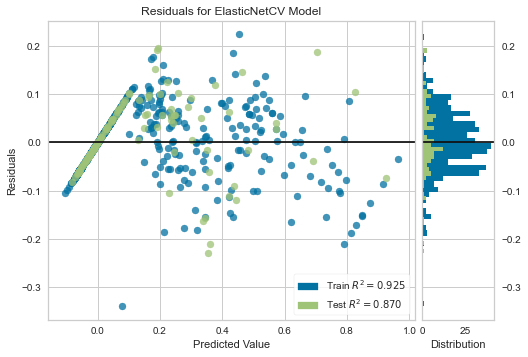

In [67]:
residualVisualizer = ResidualsPlot(ElasticModel)

residualVisualizer.fit(X_train, y_train)
residualVisualizer.score(X_test, y_test)
residualVisualizer.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  """


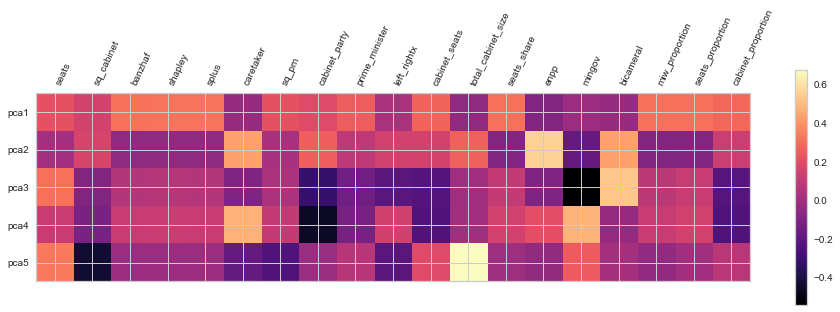

In [68]:
plt.matshow(pca1.components_,cmap='magma')
plt.yticks(range(n_components),['pca'+str(x+1) for x in range(n_components)],fontsize=10)
plt.colorbar()
plt.xticks(range(len(vals)),vals,rotation=65,ha='left')
plt.tight_layout()
plt.show()